# Exploratory Data Analysis For Covid 19 cases in Malaysia (until 10-08-2021)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import json
import plotly.express as px
import plotly.graph_objects as go
# import plotly.io as pio
# pio.renderers.default = 'browser'
# import geopandas as gpd

%matplotlib inline

In [2]:
data_Covid_Malaysia = pd.read_csv("../Covid 19 Malaysia/cases_malaysia.txt")
data_Covid_Malaysia_State = pd.read_csv("../Covid 19 Malaysia/cases_state.txt")
data_Population_Malaysia = pd.read_csv("../Covid 19 Malaysia/population.txt")

#the first entry, date 2020-03-16, its' data are cumulated from previous dates, so need to drop it
data_Covid_Malaysia.drop(index=data_Covid_Malaysia.index[:1], axis=0, inplace=True) 

#the first 16 entries, date 2020-03-16, its' data are cumulated from previous dates, so need to drop it
data_Covid_Malaysia_State.drop(index=data_Covid_Malaysia_State.index[:16], axis=0, inplace=True)
data_Covid_Malaysia_State.reset_index(drop=True, inplace=True)  #because we need to set the index started from 0 due to previous drop operation
data_Covid_Malaysia_State_Without_Date = data_Covid_Malaysia_State.drop(columns=['date'])  #date is unused for this dataset

In [3]:
data_Covid_Malaysia.head()  #show first 5 rows of the dataset

date  cases_new  cluster_import  cluster_religious  \
1  2020-01-26          0             NaN                NaN   
2  2020-01-27          0             NaN                NaN   
3  2020-01-28          0             NaN                NaN   
4  2020-01-29          3             NaN                NaN   
5  2020-01-30          1             NaN                NaN   

   cluster_community  cluster_highRisk  cluster_education  \
1                NaN               NaN                NaN   
2                NaN               NaN                NaN   
3                NaN               NaN                NaN   
4                NaN               NaN                NaN   
5                NaN               NaN                NaN   

   cluster_detentionCentre  cluster_workplace  
1                      NaN                NaN  
2                      NaN                NaN  
3                      NaN                NaN  
4                      NaN                NaN  
5                      NaN                NaN

In [4]:
data_Covid_Malaysia_State.head()  #show first 5 rows of the dataset

date            state  cases_new
0  2020-01-26            Johor          0
1  2020-01-26            Kedah          0
2  2020-01-26         Kelantan          0
3  2020-01-26           Melaka          0
4  2020-01-26  Negeri Sembilan          0

In [5]:
data_Covid_Malaysia.shape  

(563, 9)

In [6]:
data_Covid_Malaysia_State.shape

(9008, 3)

In [7]:
data_Covid_Malaysia.dtypes

date                        object
cases_new                    int64
cluster_import             float64
cluster_religious          float64
cluster_community          float64
cluster_highRisk           float64
cluster_education          float64
cluster_detentionCentre    float64
cluster_workplace          float64
dtype: object

In [8]:
data_Covid_Malaysia_State.dtypes

date         object
state        object
cases_new     int64
dtype: object

In [9]:
data_Covid_Malaysia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 563 entries, 1 to 563
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     563 non-null    object 
 1   cases_new                563 non-null    int64  
 2   cluster_import           222 non-null    float64
 3   cluster_religious        222 non-null    float64
 4   cluster_community        222 non-null    float64
 5   cluster_highRisk         222 non-null    float64
 6   cluster_education        222 non-null    float64
 7   cluster_detentionCentre  222 non-null    float64
 8   cluster_workplace        222 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 44.0+ KB


In [10]:
data_Covid_Malaysia_State.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9008 entries, 0 to 9007
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       9008 non-null   object
 1   state      9008 non-null   object
 2   cases_new  9008 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 211.2+ KB


In [11]:
data_Covid_Malaysia.describe()  #only numeric columns are shown

cases_new  cluster_import  cluster_religious  cluster_community  \
count    563.000000      222.000000         222.000000         222.000000   
mean    2308.637655        0.481982          35.207207         210.054054   
std     3818.687538        3.931212          69.675150         176.317707   
min        0.000000        0.000000           0.000000          19.000000   
25%       25.000000        0.000000           1.000000          85.500000   
50%      869.000000        0.000000           7.000000         146.500000   
75%     2878.000000        0.000000          28.000000         270.000000   
max    20889.000000       54.000000         359.000000         825.000000   

       cluster_highRisk  cluster_education  cluster_detentionCentre  \
count        222.000000         222.000000               222.000000   
mean          26.085586          43.423423                83.963964   
std           32.253898          80.450097                83.836506   
min            0.000000           0.000000                 0.000000   
25%            3.000000           0.000000                24.250000   
50%           14.000000          13.000000                62.000000   
75%           39.000000          41.000000               110.750000   
max          189.000000         501.000000               439.000000   

       cluster_workplace  
count         222.000000  
mean          754.833333  
std           471.856873  
min            57.000000  
25%           348.250000  
50%           668.000000  
75%          1128.500000  
max          2338.000000

In [12]:
data_Covid_Malaysia_State.describe()  #only numeric columns are shown

cases_new
count  9008.000000
mean    144.289853
std     481.478318
min       0.000000
25%       0.000000
50%       5.000000
75%      98.000000
max    8792.000000

In [13]:
print(data_Population_Malaysia.shape)

print(data_Population_Malaysia.info())

print(data_Population_Malaysia.describe())

data_Population_Malaysia.set_index('state', inplace=True)

(17, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   state   17 non-null     object
 1   idxs    17 non-null     int64 
 2   pop     17 non-null     int64 
 3   pop_18  17 non-null     int64 
 4   pop_60  17 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 808.0+ bytes
None
            idxs           pop        pop_18        pop_60
count  17.000000  1.700000e+01  1.700000e+01  1.700000e+01
mean    8.000000  3.842047e+06  2.754071e+06  4.120000e+05
std     5.049752  7.597089e+06  5.448646e+06  8.107364e+05
min     0.000000  9.960000e+04  6.770000e+04  5.000000e+03
25%     4.000000  1.128800e+06  8.084000e+05  1.185000e+05
50%     8.000000  1.773700e+06  1.348600e+06  2.058000e+05
75%    12.000000  2.816500e+06  2.042700e+06  3.328000e+05
max    16.000000  3.265740e+07  2.340960e+07  3.502000e+06


In [14]:
data_Covid_Malaysia_Cases = data_Covid_Malaysia[['date', 'cases_new']]  
data_Covid_Malaysia_Cases.head()

date  cases_new
1  2020-01-26          0
2  2020-01-27          0
3  2020-01-28          0
4  2020-01-29          3
5  2020-01-30          1

In [15]:
month = data_Covid_Malaysia_Cases['date'].map(lambda x: x.split('-')[1])
year = data_Covid_Malaysia_Cases['date'].map(lambda x: x.split('-')[0])

NumToMonth = {     #library that map month number to month name
    '01': 'Jan',
    '02': 'Feb',
    '03': 'Mar',
    '04': 'Apr',
    '05': 'May',
    '06': 'Jun',
    '07': 'July',
    '08': 'Aug',
    '09': 'Sep',
    '10': 'Oct',
    '11': 'Nov',
    '12': 'Dec'
}

data_Covid_Malaysia_Cases_byMonth_and_Year = data_Covid_Malaysia_Cases.groupby(by=[year, month]).sum() #we group by year first, then only month

data_Covid_Malaysia_Cases_byMonth_and_Year.index.set_names(['year', 'month'], inplace=True)
data_Covid_Malaysia_Cases_byMonth_and_Year.rename(columns={'cases_new':'total_cases_per_month'}, inplace=True)

data_Covid_Malaysia_Cases_byMonth_and_Year.reset_index(inplace=True)  #to clear mutilple indexs 'year' and 'month'

for x in data_Covid_Malaysia_Cases_byMonth_and_Year.index:
    for key, value in NumToMonth.items():
        if data_Covid_Malaysia_Cases_byMonth_and_Year['month'][x] in key:
            data_Covid_Malaysia_Cases_byMonth_and_Year.loc[x,'month'] = value   #this is when converting month number to month name
            
data_Covid_Malaysia_Cases_byMonth_and_Year['year_month'] = data_Covid_Malaysia_Cases_byMonth_and_Year['year'] + ' ' + data_Covid_Malaysia_Cases_byMonth_and_Year['month']

#drop last row because right now we want to get the total cases for each month, we will get incorrect insights if we do not drop last row since last row does not contain full month data.
data_Covid_Malaysia_Cases_byMonth_and_Year.drop(data_Covid_Malaysia_Cases_byMonth_and_Year.tail(1).index,inplace=True) # drop last rows

data_Covid_Malaysia_Cases_byMonth_and_Year

year month  total_cases_per_month year_month
0   2020   Jan                      4   2020 Jan
1   2020   Feb                     21   2020 Feb
2   2020   Mar                   2737   2020 Mar
3   2020   Apr                   3236   2020 Apr
4   2020   May                   1817   2020 May
5   2020   Jun                    811   2020 Jun
6   2020  July                    346  2020 July
7   2020   Aug                    364   2020 Aug
8   2020   Sep                   1884   2020 Sep
9   2020   Oct                  20324   2020 Oct
10  2020   Nov                  34149   2020 Nov
11  2020   Dec                  47313   2020 Dec
12  2021   Jan                 101949   2021 Jan
13  2021   Feb                  85793   2021 Feb
14  2021   Mar                  44748   2021 Mar
15  2021   Apr                  63213   2021 Apr
16  2021   May                 163644   2021 May
17  2021   Jun                 179622   2021 Jun
18  2021  July                 361293  2021 July

## Data visualization

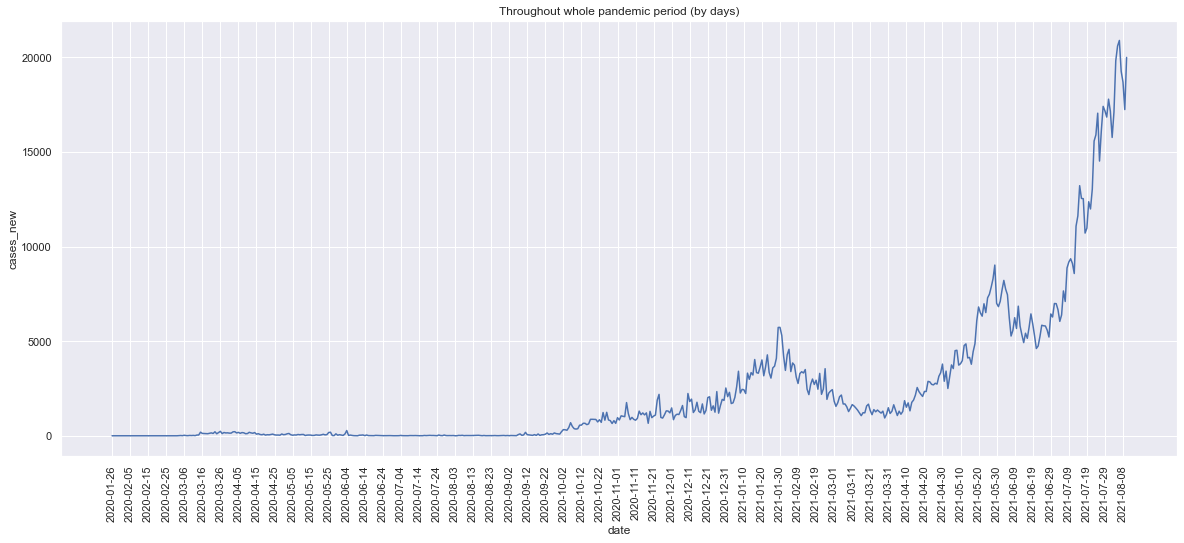

In [16]:
plt.figure(figsize=(20,8))
sns.set_theme(style="darkgrid") #to make the background more pleasing and easy to be visualized
sns.lineplot(x='date', y='cases_new', data=data_Covid_Malaysia)
plt.xticks(np.arange(0, len(data_Covid_Malaysia), step=10), rotation=90)     
plt.title('Throughout whole pandemic period (by days)')
plt.show()

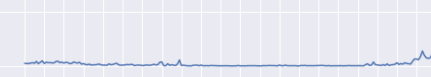

#### from this image we can see that there are not much different throughout first few months, so we better use log scale method to see the details for said periods. 

#### Now let's see if we change from linear scale to log scale (base 10) 

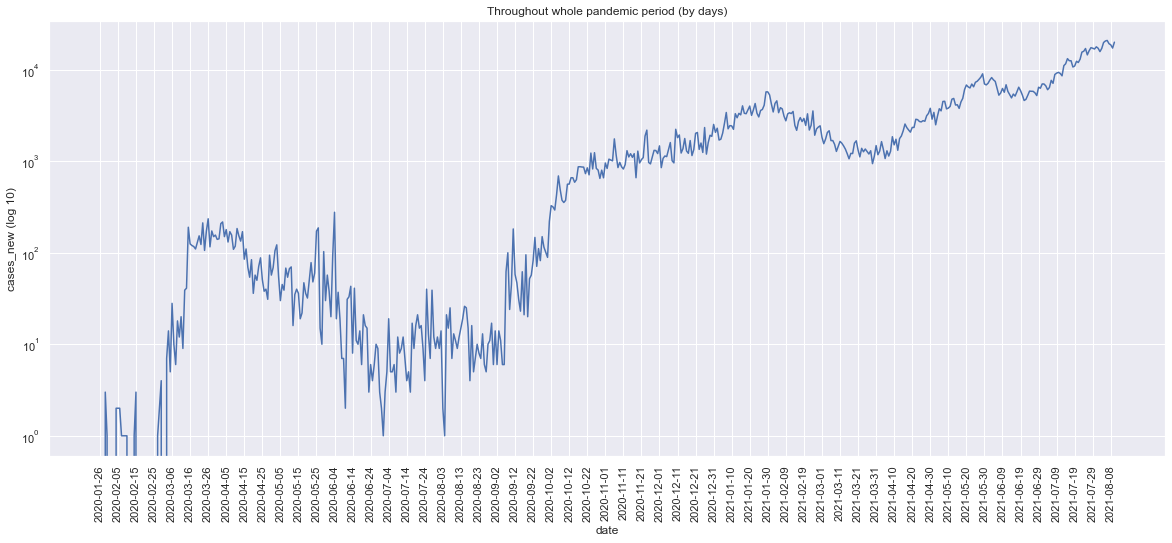

In [17]:
plt.figure(figsize=(20,8))
sns.set_theme(style="darkgrid") #to make the background more pleasing and easy to be visualized
sns.lineplot(x='date', y='cases_new', data=data_Covid_Malaysia)
plt.yscale('log', base=10) 
plt.xticks(np.arange(0, len(data_Covid_Malaysia), step=10), rotation=90)     
plt.title('Throughout whole pandemic period (by days)')
plt.ylabel("cases_new (log 10)")
plt.show()

#### so now we can see the details cleary for the first few months

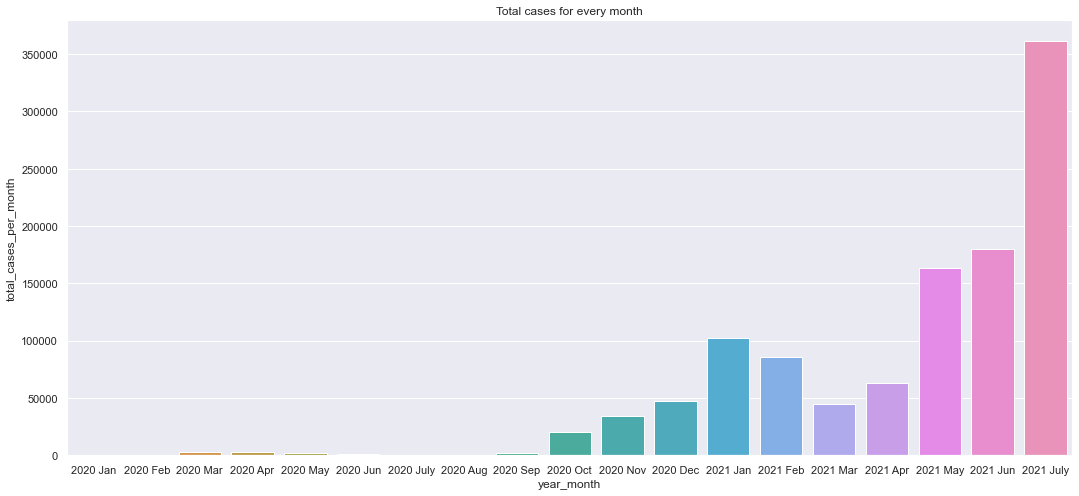

In [18]:
plt.figure(figsize=(18,8))
sns.barplot(x="year_month", y="total_cases_per_month", data=data_Covid_Malaysia_Cases_byMonth_and_Year)
plt.xticks(rotation=0)     
plt.title('Total cases for every month')
plt.show()

In [19]:
data_Covid_Malaysia_State_total = data_Covid_Malaysia_State_Without_Date.groupby(by='state').sum().sort_values('cases_new', ascending=False)

data_Covid_Malaysia_State_total.rename(columns={'cases_new':'total_cases_per_state'}, inplace=True)
data_Covid_Malaysia_State_total

total_cases_per_state
state                                   
Selangor                          478093
W.P. Kuala Lumpur                 144345
Johor                             103024
Sabah                              96465
Sarawak                            82753
Negeri Sembilan                    80556
Kedah                              59756
Pulau Pinang                       54019
Kelantan                           51377
Perak                              45812
Melaka                             36522
Pahang                             30268
Terengganu                         21575
W.P. Labuan                         9720
W.P. Putrajaya                      4620
Perlis                               858

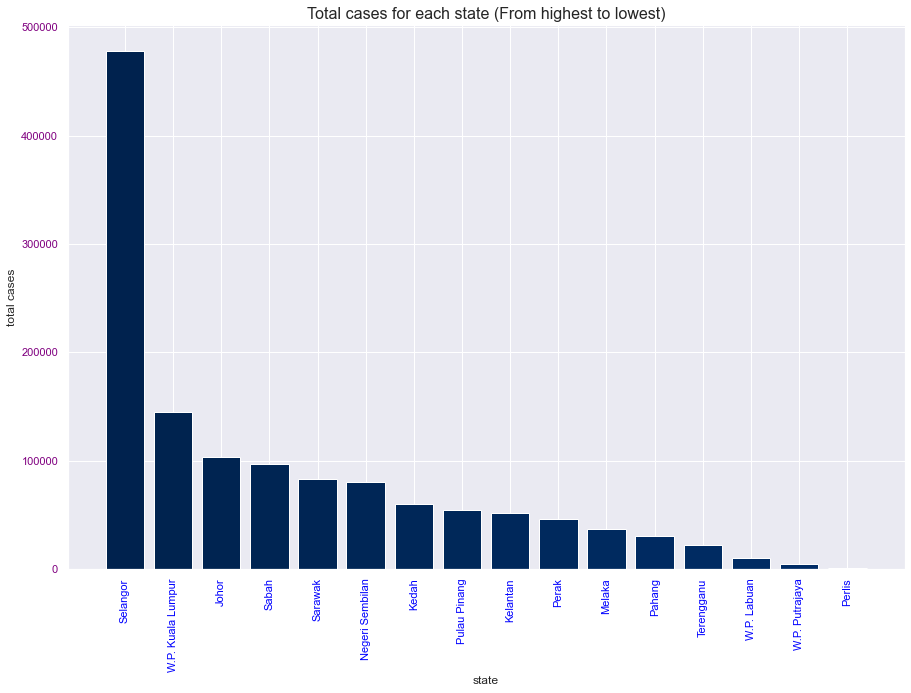

In [20]:
fig, ax = plt.subplots(figsize=(15,10))
my_cmap = plt.get_cmap("cividis")
ax.bar(x=data_Covid_Malaysia_State_total.index, height=data_Covid_Malaysia_State_total['total_cases_per_state'], color=my_cmap.colors)
ax.set_title('Total cases for each state (From highest to lowest)', fontsize=16)
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(data_Covid_Malaysia_State_total.index, rotation=90)
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='purple')
ax.set_xlabel('state')
ax.set_ylabel('total cases')
plt.show()

In [21]:
data_Covid_Malaysia_Cases_Pop = data_Covid_Malaysia_State_total.merge(data_Population_Malaysia['pop'], copy=False, how='inner', on='state')   
#now we join 2 dataset together based on 'state' column

data_Covid_Malaysia_Cases_Pop

total_cases_per_state      pop
state                                            
Selangor                          478093  6538000
W.P. Kuala Lumpur                 144345  1773700
Johor                             103024  3781000
Sabah                              96465  3908500
Sarawak                            82753  2816500
Negeri Sembilan                    80556  1128800
Kedah                              59756  2185100
Pulau Pinang                       54019  1773600
Kelantan                           51377  1906700
Perak                              45812  2510300
Melaka                             36522   932700
Pahang                             30268  1678700
Terengganu                         21575  1259300
W.P. Labuan                         9720    99600
W.P. Putrajaya                      4620   110000
Perlis                               858   254900

In [22]:
data_Covid_Malaysia_Cases_Pop['cases_population_percentage (%)'] = round(data_Covid_Malaysia_Cases_Pop['total_cases_per_state'] / data_Covid_Malaysia_Cases_Pop['pop'] * 100, 2)
data_Covid_Malaysia_Cases_Pop

total_cases_per_state      pop  \
state                                               
Selangor                          478093  6538000   
W.P. Kuala Lumpur                 144345  1773700   
Johor                             103024  3781000   
Sabah                              96465  3908500   
Sarawak                            82753  2816500   
Negeri Sembilan                    80556  1128800   
Kedah                              59756  2185100   
Pulau Pinang                       54019  1773600   
Kelantan                           51377  1906700   
Perak                              45812  2510300   
Melaka                             36522   932700   
Pahang                             30268  1678700   
Terengganu                         21575  1259300   
W.P. Labuan                         9720    99600   
W.P. Putrajaya                      4620   110000   
Perlis                               858   254900   

                   cases_population_percentage (%)  
state                                               
Selangor                                      7.31  
W.P. Kuala Lumpur                             8.14  
Johor                                         2.72  
Sabah                                         2.47  
Sarawak                                       2.94  
Negeri Sembilan                               7.14  
Kedah                                         2.73  
Pulau Pinang                                  3.05  
Kelantan                                      2.69  
Perak                                         1.82  
Melaka                                        3.92  
Pahang                                        1.80  
Terengganu                                    1.71  
W.P. Labuan                                   9.76  
W.P. Putrajaya                                4.20  
Perlis                                        0.34

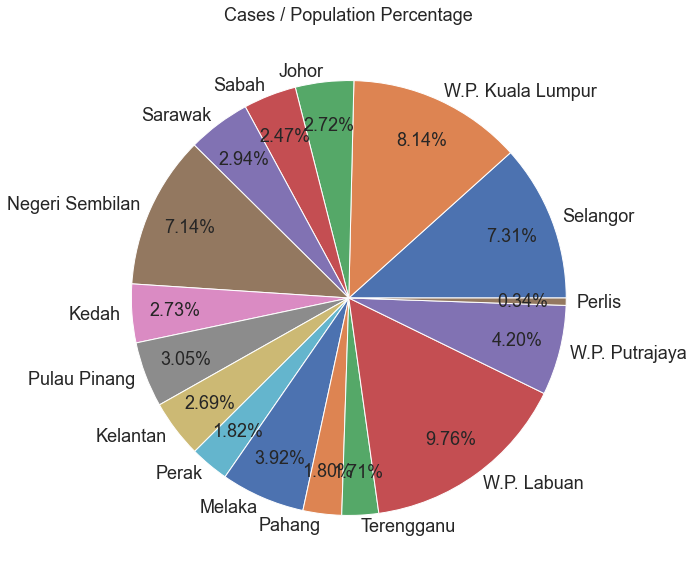

In [23]:
plt.figure(figsize=(10,10))
plt.rcParams['font.size'] = 18.0
patches, texts, autotexts = plt.pie(data_Covid_Malaysia_Cases_Pop['cases_population_percentage (%)'], 
                                    labels = data_Covid_Malaysia_Cases_Pop.index, 
                                    autopct=lambda x: '{:.2f}%'.format(x*data_Covid_Malaysia_Cases_Pop['cases_population_percentage (%)'].sum()/100), 
                                    pctdistance=0.8, 
                                    labeldistance=1.05
                                    )
[ text.set_fontsize(18) for text in texts ]  #list comprehension, set every label font to desired size
plt.title('Cases / Population Percentage', fontsize = 18)
plt.show()

In [24]:
data_Covid_Malaysia_Cases_Pop_Sorted = data_Covid_Malaysia_Cases_Pop.sort_values('cases_population_percentage (%)', ascending=False)
data_Covid_Malaysia_Cases_Pop_Sorted.head(5)

total_cases_per_state      pop  \
state                                               
W.P. Labuan                         9720    99600   
W.P. Kuala Lumpur                 144345  1773700   
Selangor                          478093  6538000   
Negeri Sembilan                    80556  1128800   
W.P. Putrajaya                      4620   110000   

                   cases_population_percentage (%)  
state                                               
W.P. Labuan                                   9.76  
W.P. Kuala Lumpur                             8.14  
Selangor                                      7.31  
Negeri Sembilan                               7.14  
W.P. Putrajaya                                4.20

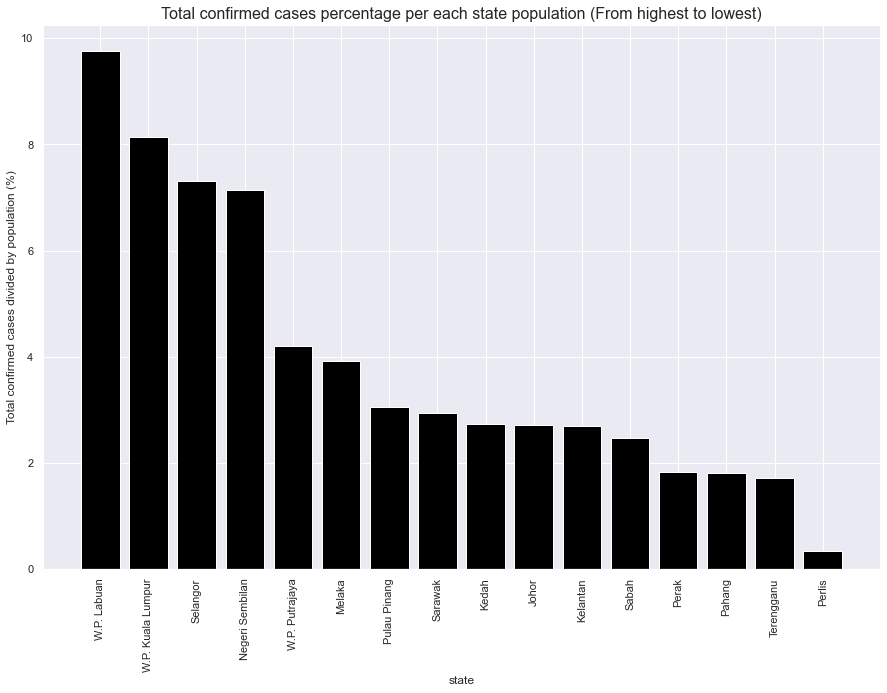

In [25]:
fig, ax = plt.subplots(figsize=(15,10))
ax.bar(x=data_Covid_Malaysia_Cases_Pop_Sorted.index, height=data_Covid_Malaysia_Cases_Pop_Sorted['cases_population_percentage (%)'], color='black')
ax.set_title('Total confirmed cases percentage per each state population (From highest to lowest)', fontsize=16)
ax.set_xticks(ax.get_xticks())
ax.set_xlabel("state")
ax.set_ylabel("Total confirmed cases divided by population (%)")
ax.set_xticklabels(data_Covid_Malaysia_Cases_Pop_Sorted.index, rotation=90)
plt.show()

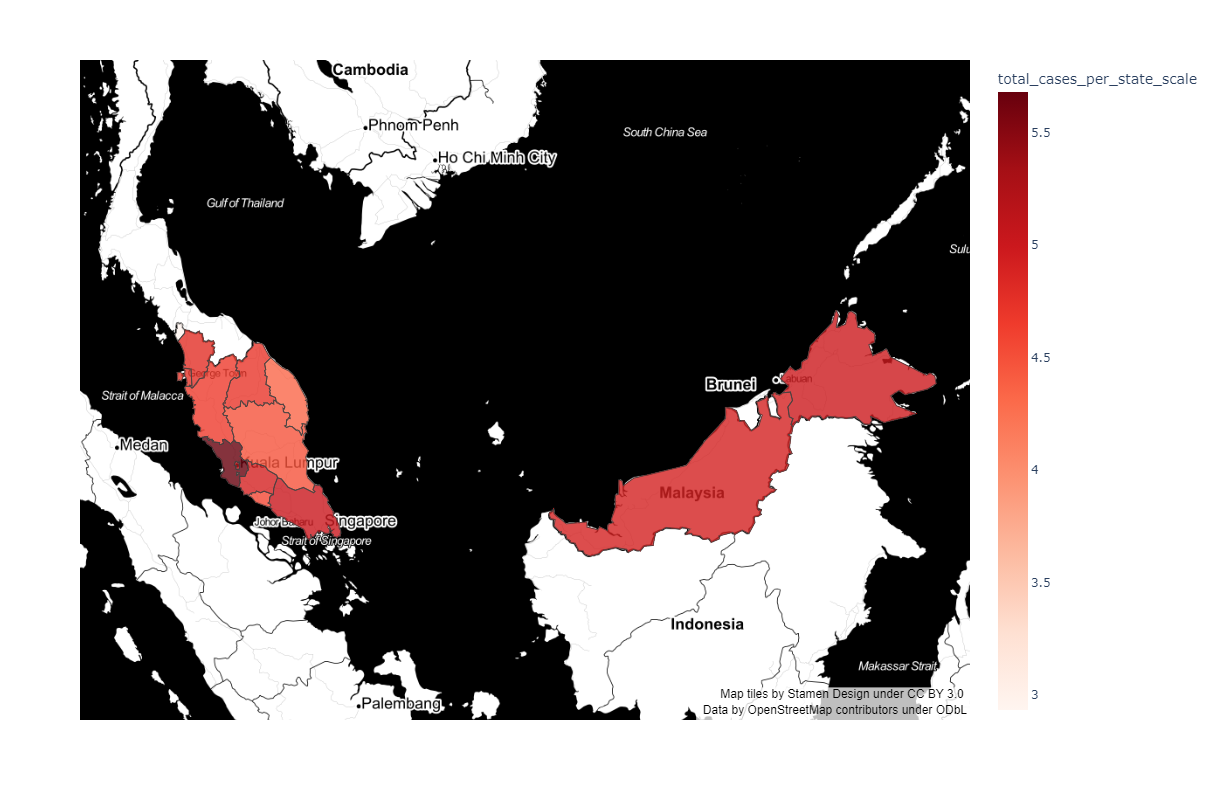

In [26]:
malaysia_states = json.load(open('malaysia.geojson', 'r'))

# data_Covid_Malaysia_Cases_Pop['id'] = range(1, 1+len(data_Covid_Malaysia_Cases_Pop))

state_id_geojson = {}  #declare dictionary
for feature in malaysia_states['features']:
    feature['id'] = feature['properties']['cartodb_id']
    state_id_geojson[feature['properties']['name']] = feature['id']

# W.P. Labuan does not have its coordinates currently
data_Covid_Malaysia_Cases_Pop_reset_index = data_Covid_Malaysia_Cases_Pop[data_Covid_Malaysia_Cases_Pop.index != 'W.P. Labuan'].reset_index() 

# match the name between geojson and dataset, so we change the keys in dict
state_id_geojson['W.P. Kuala Lumpur'] = state_id_geojson.pop('Federal Territory of Kuala Lumpur')
state_id_geojson['Pulau Pinang'] = state_id_geojson.pop('Penang')
state_id_geojson['W.P. Putrajaya'] = state_id_geojson.pop('Federal Territory of Putrajaya')

data_Covid_Malaysia_Cases_Pop_reset_index['id'] = data_Covid_Malaysia_Cases_Pop_reset_index['state'].apply(lambda x: state_id_geojson[x])
data_Covid_Malaysia_Cases_Pop_reset_index['total_cases_per_state_scale'] = np.log10(data_Covid_Malaysia_Cases_Pop_reset_index['total_cases_per_state']) # because the data is widely spread, we have to scale the data by logarithmic scale technique 

fig = px.choropleth_mapbox(data_Covid_Malaysia_Cases_Pop_reset_index, 
                    locations='id', 
                    geojson=malaysia_states, 
                    color='total_cases_per_state_scale', 
                    hover_name='state',
                    hover_data=['total_cases_per_state'],
                    mapbox_style='stamen-toner',
                    center={'lat': 5, 'lon': 109.5},
                    zoom=5,
                    color_continuous_scale=px.colors.sequential.Reds,
                    opacity=0.8)
fig.update_geos(fitbounds='locations', visible=False)
fig.update_layout(width=1200, height=800)
            
fig.show()

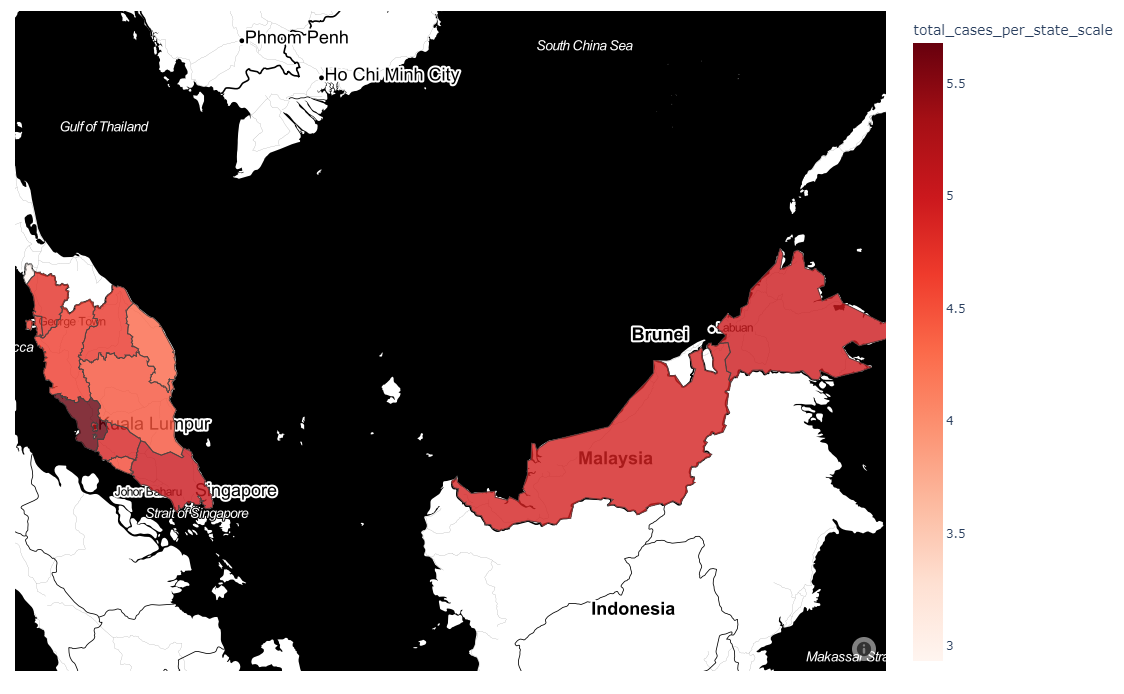

#### *note: the above map is rendered from my local jupyterlab, because this map cannot be rendered in github. you can clcik on 'external view availble with nbviewver' at the top right corner to see the map details.
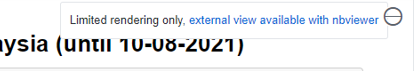 

#### the above map shows that the total covid-19 confirmed cases happened in each state. the saturity of each area represents the severity of circumstances. More saturated it is, then more number of cases.

# Reference

- https://github.com/codeforamerica/click_that_hood/blob/master/public/data/malaysia.geojson
- https://github.com/MoH-Malaysia/covid19-public